# Tree-Based Algorithm ML Analysis for BPJS Antrol Patients

This notebook performs machine learning analysis on BPJS antrol patients data using tree-based algorithms to predict patient outcomes or patterns. It's designed specifically for Google Colab execution with CSV data from the database folder.

## Proyek Klasifikasi (Supervised Learning)

Tujuan: "Analisis Komperenshif Identifikasi Pendaftaran Pasien BPJS Add Antroll"

Kasus: Analisis Klasifikasi Pasien BPJS Add Antrol

### Persyaratan Proyek:

- Definisi Masalah: Membantu manajemen rumah sakit memahami pola pendaftaran pasien BPJS dan memprediksi jenis pembayaran atau status kunjungan pasien berdasarkan data pendaftaran.

- Kompleksitas Dataset: Dataset yang diproses memiliki campuran fitur numerik dan kategorikal serta menunjukkan proses preprocessing yang kompleks.

### Permasalahan Utama:

Analisis pola keberhasilan dan kegagalan pendaftaran pasien BPJS melalui dua kanal yaitu Anjungan Pendaftaran Mandiri (APM) dan aplikasi Mobile JKN. Melalui pendekatan analisis log dan metode clustering dalam penerapan machine learning dengan menggunakan Tree-Based Algorithm: Decision Tree, Random Forest dan Gradient Boosting. bertujuan untuk mengidentifikasi faktor-faktor penyebab dan memberikan rekomendasi peningkatan efektivitas pelayanan digital rumah sakit.

Secara tidak optimalnya proses pendaftaran pasien BPJS pada kanal APM dan Mobile JKN karena adanya variasi tingkat keberhasilan dan kegagalan pengiriman data (status_kirim) yang menunjukkan pola berbeda, namun belum dianalisis secara komprehensif.

### Kebutuhan Bisnis:
1. Memahami faktor-faktor yang mempengaruhi keberhasilan pendaftaran BPJS melalui APM dan Mobile JKN
2. Mengidentifikasi pola kegagalan pendaftaran untuk perbaikan sistem
3. Memberikan rekomendasi untuk meningkatkan efektivitas layanan digital rumah sakit
4. Membantu manajemen dalam pengambilan keputusan terkait layanan pendaftaran pasien BPJS

### Tujuan Analisis:
- Mengklasifikasikan keberhasilan/kegagalan pendaftaran pasien BPJS berdasarkan berbagai faktor
- Menganalisis perbedaan pola pendaftaran antara kanal APM dan Mobile JKN
- Mengidentifikasi variabel-variabel penting yang mempengaruhi keberhasilan pendaftaran
- Membangun model prediktif untuk membantu pengambilan keputusan

## 1. Understanding Business

Pemahaman kebutuhan bisnis dan tujuan analisis

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Create image directory
import os
image_dir = '../image'
os.makedirs(image_dir, exist_ok=True)

# Load the dataset
df = pd.read_csv('../database/bpjs antrol.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Dataset loaded successfully!
Dataset shape: (139403, 20)
Columns: ['no_rawat', 'tgl_registrasi', 'jam_reg', 'kd_dokter', 'nm_dokter', 'no_rkm_medis', 'nm_pasien', 'kd_poli', 'nm_poli', 'status_lanjut', 'kd_pj', 'png_jawab', 'tanggal_periksa', 'nomor_kartu', 'nomor_referensi', 'kodebooking', 'jenis_kunjungan', 'status_kirim', 'keterangan', 'USER']


In [2]:
# Understanding Business
print("\n=== BUSINESS UNDERSTANDING ===")
print("\nBusiness Problem:")
print("- Analisis pola keberhasilan dan kegagalan pendaftaran pasien BPJS melalui dua kanal yaitu Anjungan Pendaftaran Mandiri (APM) dan aplikasi Mobile JKN")
print("- Tidak optimalnya proses pendaftaran pasien BPJS pada kanal APM dan Mobile JKN karena adanya variasi tingkat keberhasilan dan kegagalan pengiriman data (status_kirim)")
print("\nBusiness Objectives:")
print("- Memahami faktor-faktor yang mempengaruhi keberhasilan pendaftaran BPJS")
print("- Mengidentifikasi pola kegagalan pendaftaran untuk perbaikan sistem")
print("- Memberikan rekomendasi untuk meningkatkan efektivitas layanan digital rumah sakit")
print("- Membantu manajemen dalam pengambilan keputusan terkait layanan pendaftaran pasien BPJS")


=== BUSINESS UNDERSTANDING ===

Business Problem:
- Analisis pola keberhasilan dan kegagalan pendaftaran pasien BPJS melalui dua kanal yaitu Anjungan Pendaftaran Mandiri (APM) dan aplikasi Mobile JKN
- Tidak optimalnya proses pendaftaran pasien BPJS pada kanal APM dan Mobile JKN karena adanya variasi tingkat keberhasilan dan kegagalan pengiriman data (status_kirim)

Business Objectives:
- Memahami faktor-faktor yang mempengaruhi keberhasilan pendaftaran BPJS
- Mengidentifikasi pola kegagalan pendaftaran untuk perbaikan sistem
- Memberikan rekomendasi untuk meningkatkan efektivitas layanan digital rumah sakit
- Membantu manajemen dalam pengambilan keputusan terkait layanan pendaftaran pasien BPJS


## 2. Data Understanding

Eksplorasi dan pemahaman struktur data

In [3]:
# Data Understanding
print("\n=== DATA UNDERSTANDING ===")
print(f"\nDataset shape: {df.shape}")
print(f"\nDataset info:")
df.info()


=== DATA UNDERSTANDING ===

Dataset shape: (139403, 20)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139403 entries, 0 to 139402
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   no_rawat         139403 non-null  object 
 1   tgl_registrasi   139403 non-null  object 
 2   jam_reg          139403 non-null  object 
 3   kd_dokter        139403 non-null  int64  
 4   nm_dokter        139403 non-null  object 
 5   no_rkm_medis     139403 non-null  int64  
 6   nm_pasien        139403 non-null  object 
 7   kd_poli          139403 non-null  object 
 8   nm_poli          139403 non-null  object 
 9   status_lanjut    139403 non-null  object 
 10  kd_pj            139403 non-null  object 
 11  png_jawab        139403 non-null  object 
 12  tanggal_periksa  139403 non-null  object 
 13  nomor_kartu      139391 non-null  float64
 14  nomor_referensi  139343 non-null  object 
 15  kodebooking  

In [4]:
# Display first few rows
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,no_rawat,tgl_registrasi,jam_reg,kd_dokter,nm_dokter,no_rkm_medis,nm_pasien,kd_poli,nm_poli,status_lanjut,kd_pj,png_jawab,tanggal_periksa,nomor_kartu,nomor_referensi,kodebooking,jenis_kunjungan,status_kirim,keterangan,USER
0,2025/01/02/000001,2/1/2025,09:40:00,197808082006042015,"dr. Yenni Yustini, Sp. S",220431,NORJANNAH Ny,SAR,KLINIK SARAF,Ralan,BPJ,BPJS Kesehatan,3/6/2025,1.925737e+09,170601020525P001191,1706R00620250603000001SAR001,1,Sudah,200: Ok.,SEP Mandiri
1,2025/01/02/000001,2/1/2025,09:40:00,197808082006042015,"dr. Yenni Yustini, Sp. S",220431,NORJANNAH Ny,SAR,KLINIK SARAF,Ralan,BPJ,BPJS Kesehatan,2/1/2025,1.925737e+09,1706R0061224K000107,1706R00620241230123721SAR001MJKN,3,Ambil Antrian,NaN,SEP Mandiri
2,2025/01/02/000001,2/1/2025,09:40:00,197808082006042015,"dr. Yenni Yustini, Sp. S",220431,NORJANNAH Ny,SAR,KLINIK SARAF,Ralan,BPJ,BPJS Kesehatan,3/2/2025,1.925737e+09,1706R0060125K000084,1706R00620250127065756SAR001MJKN,3,Sudah,Terdapat duplikasi Kode Booking,SEP Mandiri
3,2025/01/02/000001,2/1/2025,09:40:00,197808082006042015,"dr. Yenni Yustini, Sp. S",220431,NORJANNAH Ny,SAR,KLINIK SARAF,Ralan,BPJ,BPJS Kesehatan,9/4/2025,1.925737e+09,1706R0060325K000215,1706R00620250401090826SAR001MJKN,3,Sudah,Terdapat duplikasi Kode Booking,SEP Mandiri
4,2025/01/02/000001,2/1/2025,09:40:00,197808082006042015,"dr. Yenni Yustini, Sp. S",220431,NORJANNAH Ny,SAR,KLINIK SARAF,Ralan,BPJ,BPJS Kesehatan,3/3/2025,1.925737e+09,170601020225Y001714,1706R00620250224064125SAR001MJKN,1,Sudah,Terdapat duplikasi Kode Booking,SEP Mandiri


In [5]:
# Statistical summary
print("\nStatistical summary:")
df.describe(include='all').style.background_gradient(cmap='RdPu')


Statistical summary:


,no_rawat,tgl_registrasi,jam_reg,kd_dokter,nm_dokter,no_rkm_medis,nm_pasien,kd_poli,nm_poli,status_lanjut,kd_pj,png_jawab,tanggal_periksa,nomor_kartu,nomor_referensi,kodebooking,jenis_kunjungan,status_kirim,keterangan,USER
count,139403,139403,139403,139403.000000,139403,139403.000000,139403,139403,139403,139403,139403,139403,139403,139391.000000,139343,139403,139403.000000,139403,133252,139403
unique,20724,133,9777,nan,19,nan,6012,14,14,1,3,3,150,nan,21734,23944,nan,4,127,12
top,2025/02/04/000254,30/1/2025,09:40:00,nan,"dr. H. Rezekian, Sp.M",nan,MUHAMMAD ANSYARI Tn,INT,KLINIK PENYAKIT DALAM,Ralan,BPJ,BPJS Kesehatan,24/2/2025,nan,170601010125Y001407,1706R00620250217000151PAR015,nan,Sudah,200: Ok.,SEP Mandiri
freq,42,2281,4144,nan,25552,nan,897,26518,26518,139403,139325,139325,2137,nan,128,100,nan,119287,98654,53875
mean,nan,nan,nan,179309322293157696.000000,nan,171141.068671,nan,nan,nan,nan,nan,nan,nan,1879596713.837507,nan,nan,2.496969,nan,nan,nan
std,nan,nan,nan,58179966611383528.000000,nan,59025.074724,nan,nan,nan,nan,nan,nan,nan,1128069252.539038,nan,nan,0.860991,nan,nan,nan
min,nan,nan,nan,91405241.000000,nan,8.000000,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,1.000000,nan,nan,nan
25%,nan,nan,nan,197807232005011008.000000,nan,135614.000000,nan,nan,nan,nan,nan,nan,nan,892282735.000000,nan,nan,2.000000,nan,nan,nan
50%,nan,nan,nan,197808082006042016.000000,nan,186547.000000,nan,nan,nan,nan,nan,nan,nan,1971525464.000000,nan,nan,3.000000,nan,nan,nan
75%,nan,nan,nan,198605262014120992.000000,nan,225183.000000,nan,nan,nan,nan,nan,nan,nan,2823918658.000000,nan,nan,3.000000,nan,nan,nan


In [6]:
# Check unique values in categorical columns
categorical_columns = ['status_lanjut', 'kd_pj', 'png_jawab', 'jenis_kunjungan', 'status_kirim', 'USER']
for col in categorical_columns:
    if col in df.columns:
        print(f"\nUnique values in {col}:")
        print(df[col].value_counts())


Unique values in status_lanjut:
status_lanjut
Ralan    139403
Name: count, dtype: int64

Unique values in kd_pj:
kd_pj
BPJ    139325
DPP        51
A09        27
Name: count, dtype: int64

Unique values in png_jawab:
png_jawab
BPJS Kesehatan    139325
DPP                   51
UMUM                  27
Name: count, dtype: int64

Unique values in jenis_kunjungan:
jenis_kunjungan
3    103257
1     34156
2      1901
4        89
Name: count, dtype: int64

Unique values in status_kirim:
status_kirim
Sudah            119287
Gagal             13767
Ambil Antrian      4167
Belum              2182
Name: count, dtype: int64

Unique values in USER:
USER
SEP Mandiri    53875
51410241       25851
51383242       20026
71331232       19993
51334232       17945
59037162        1599
AdminUtam         76
59031162          14
59030161          10
59341232           8
51382242           3
51248211           3
Name: count, dtype: int64


## 3. Data Preparation/Wrangling

Persiapan dan pengolahan data

In [7]:
# Data Preparation
print("\n=== DATA PREPARATION/WRANGLING ===")

# Check for missing values
print("\nMissing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


=== DATA PREPARATION/WRANGLING ===

Missing values:
nomor_kartu          12
nomor_referensi      60
keterangan         6151
dtype: int64


In [8]:
# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
no_rawat            object
tgl_registrasi      object
jam_reg             object
kd_dokter            int64
nm_dokter           object
no_rkm_medis         int64
nm_pasien           object
kd_poli             object
nm_poli             object
status_lanjut       object
kd_pj               object
png_jawab           object
tanggal_periksa     object
nomor_kartu        float64
nomor_referensi     object
kodebooking         object
jenis_kunjungan      int64
status_kirim        object
keterangan          object
USER                object
dtype: object


In [9]:
# Create a copy of the dataset for processing
df_processed = df.copy()
print("Dataset copy created for processing")

Dataset copy created for processing


## 4. Data Cleaning

Pembersihan data dari ketidakkonsistenan

In [10]:
# Data Cleaning
print("\n=== DATA CLEANING ===")

# Check for duplicates
duplicates = df_processed.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df_processed = df_processed.drop_duplicates()
    print(f"Duplicates removed. New shape: {df_processed.shape}")


=== DATA CLEANING ===
Number of duplicate rows: 6170
Duplicates removed. New shape: (133233, 20)


In [11]:
# Handle missing values
print("\nHandling missing values...")

# For categorical columns, fill with mode
categorical_cols = ['kd_dokter', 'nm_dokter', 'nm_pasien', 'kd_poli', 'nm_poli', 'status_lanjut', 
                   'kd_pj', 'png_jawab', 'nomor_referensi', 'kodebooking', 'jenis_kunjungan', 
                   'status_kirim', 'keterangan', 'USER']

for col in categorical_cols:
    if col in df_processed.columns:
        mode_value = df_processed[col].mode()[0] if not df_processed[col].mode().empty else 'Unknown'
        df_processed[col].fillna(mode_value, inplace=True)
        print(f"Filled missing values in {col} with mode: {mode_value}")

# For numerical columns, fill with median
numerical_cols = ['no_rkm_medis']
for col in numerical_cols:
    if col in df_processed.columns:
        median_value = df_processed[col].median()
        df_processed[col].fillna(median_value, inplace=True)
        print(f"Filled missing values in {col} with median: {median_value}")


Handling missing values...
Filled missing values in kd_dokter with mode: 197807232005011009
Filled missing values in nm_dokter with mode: dr. H. Rezekian, Sp.M
Filled missing values in nm_pasien with mode: MUHAMMAD ANSYARI Tn
Filled missing values in kd_poli with mode: INT
Filled missing values in nm_poli with mode: KLINIK PENYAKIT DALAM
Filled missing values in status_lanjut with mode: Ralan
Filled missing values in kd_pj with mode: BPJ
Filled missing values in png_jawab with mode: BPJS Kesehatan
Filled missing values in nomor_referensi with mode: 170601010125Y001407
Filled missing values in kodebooking with mode: 1706R00620250107000278GND016
Filled missing values in jenis_kunjungan with mode: 3
Filled missing values in status_kirim with mode: Sudah
Filled missing values in keterangan with mode: 200: Ok.
Filled missing values in USER with mode: SEP Mandiri
Filled missing values in no_rkm_medis with median: 186641.0


In [12]:
# Check for any remaining missing values
print("\nMissing values after cleaning:")
missing_values_after = df_processed.isnull().sum()
print(missing_values_after[missing_values_after > 0])


Missing values after cleaning:
nomor_kartu    12
dtype: int64


In [13]:
# Check for inconsistencies in data
print("\nChecking for data inconsistencies...")

# Check unique values in key categorical columns
print(f"\nUnique values in status_kirim: {df_processed['status_kirim'].unique()}")
print(f"\nUnique values in jenis_kunjungan: {df_processed['jenis_kunjungan'].unique()}")
print(f"\nUnique values in status_lanjut: {df_processed['status_lanjut'].unique()}")


Checking for data inconsistencies...

Unique values in status_kirim: ['Sudah' 'Ambil Antrian' 'Gagal' 'Belum']

Unique values in jenis_kunjungan: [1 3 2 4]

Unique values in status_lanjut: ['Ralan']


## 5. Explanatory Data Analysis (EDA Deskriptif)

Analisis deskriptif awal

In [14]:
# EDA Deskriptif
print("\n=== EXPLANATORY DATA ANALYSIS (DESKRIPTIF) ===")

# Basic statistics
print("\nDataset shape:", df_processed.shape)
print("\nColumns:", df_processed.columns.tolist())


=== EXPLANATORY DATA ANALYSIS (DESKRIPTIF) ===

Dataset shape: (133233, 20)

Columns: ['no_rawat', 'tgl_registrasi', 'jam_reg', 'kd_dokter', 'nm_dokter', 'no_rkm_medis', 'nm_pasien', 'kd_poli', 'nm_poli', 'status_lanjut', 'kd_pj', 'png_jawab', 'tanggal_periksa', 'nomor_kartu', 'nomor_referensi', 'kodebooking', 'jenis_kunjungan', 'status_kirim', 'keterangan', 'USER']


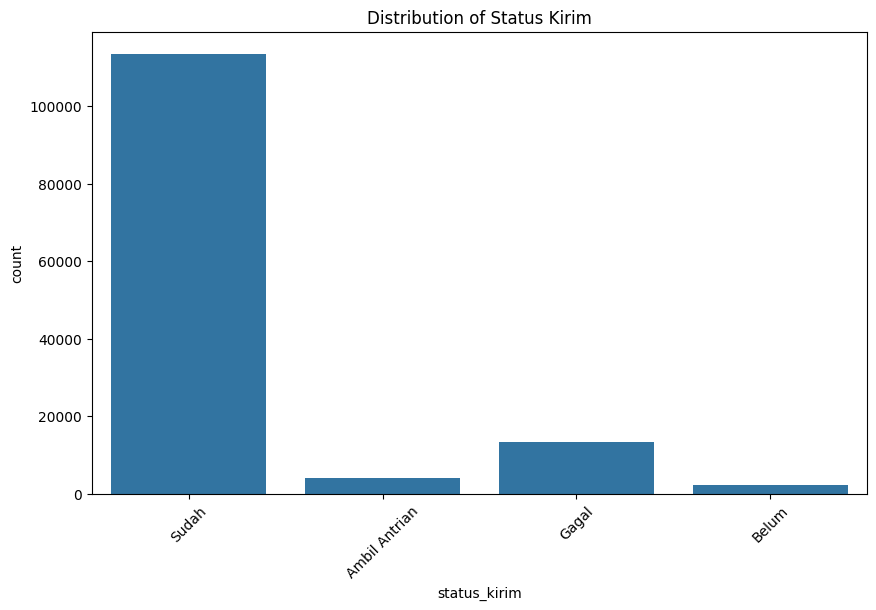


Status Kirim distribution:
status_kirim
Sudah            113564
Gagal             13320
Ambil Antrian      4167
Belum              2182
Name: count, dtype: int64


In [15]:
# Distribution of target variable (status_kirim)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_processed, x='status_kirim')
plt.title('Distribution of Status Kirim')
plt.xticks(rotation=45)
plt.savefig(os.path.join(image_dir, 'eda_status_kirim.png'), dpi=300, bbox_inches='tight')
plt.show()

print("\nStatus Kirim distribution:")
print(df_processed['status_kirim'].value_counts())

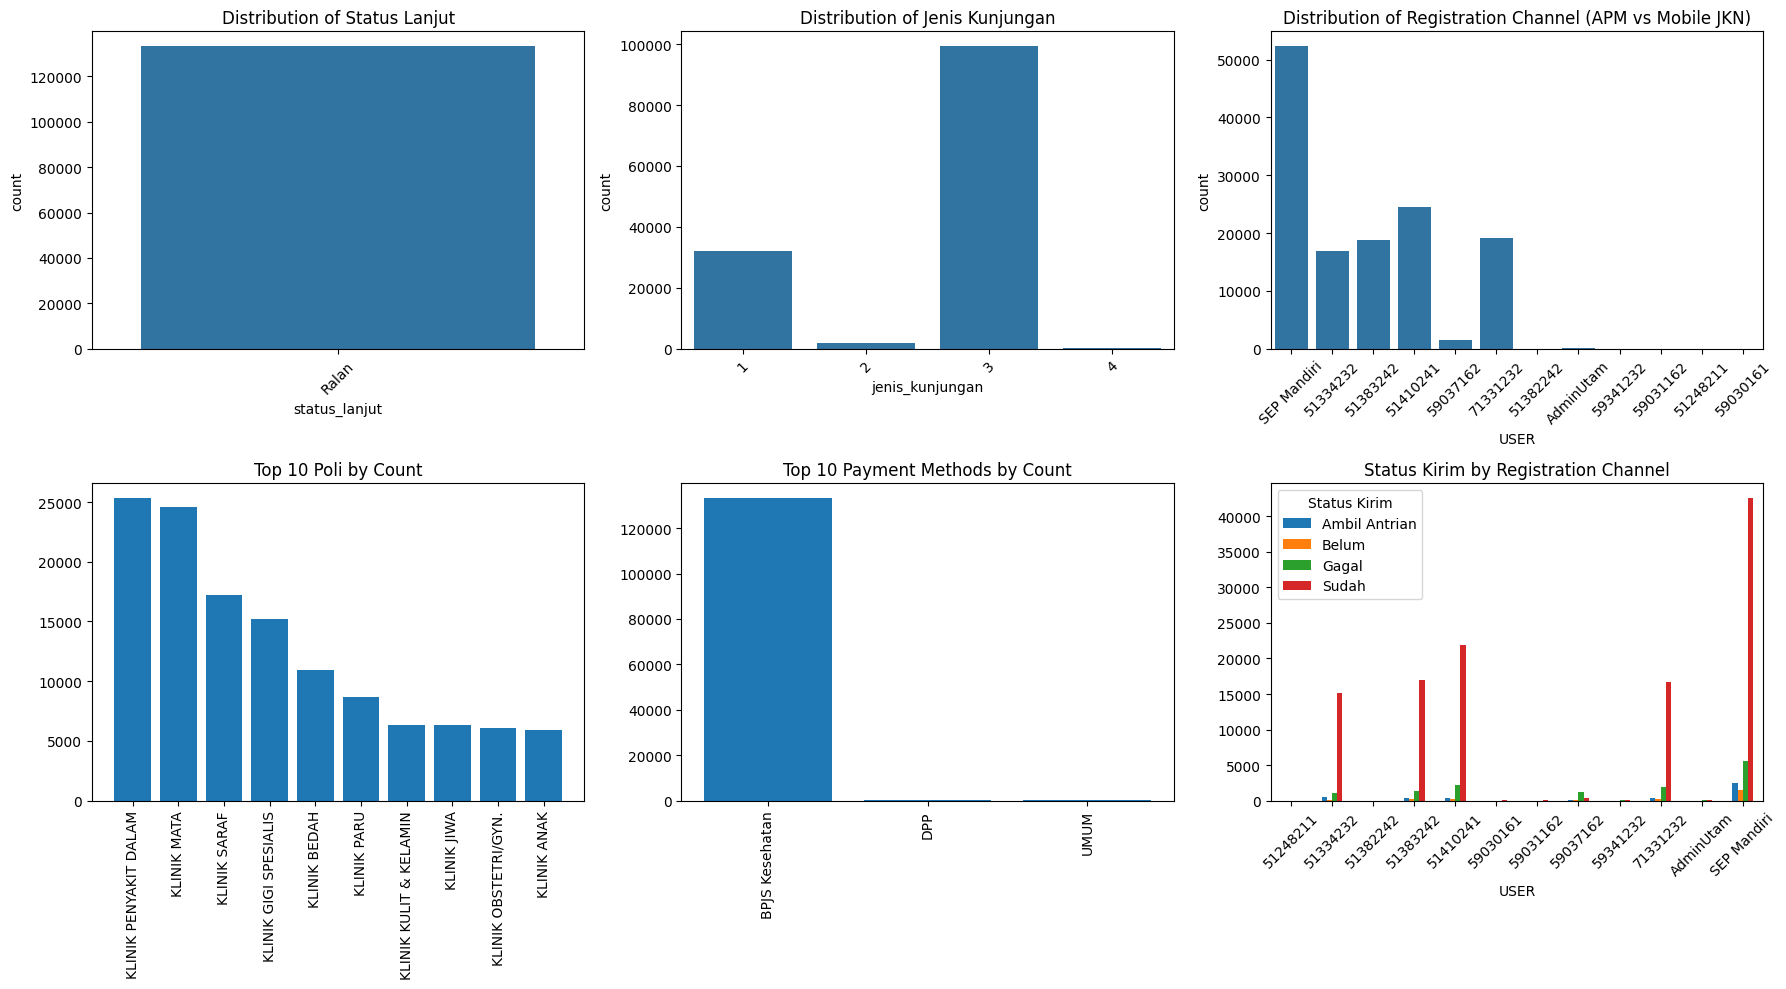

In [16]:
# Distribution of other important categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Status Lanjut
sns.countplot(data=df_processed, x='status_lanjut', ax=axes[0,0])
axes[0,0].set_title('Distribution of Status Lanjut')
axes[0,0].tick_params(axis='x', rotation=45)

# Jenis Kunjungan
sns.countplot(data=df_processed, x='jenis_kunjungan', ax=axes[0,1])
axes[0,1].set_title('Distribution of Jenis Kunjungan')
axes[0,1].tick_params(axis='x', rotation=45)

# USER (APM vs Mobile JKN)
sns.countplot(data=df_processed, x='USER', ax=axes[0,2])
axes[0,2].set_title('Distribution of Registration Channel (APM vs Mobile JKN)')
axes[0,2].tick_params(axis='x', rotation=45)

# Top 10 Poli
top_10_poli = df_processed['nm_poli'].value_counts().head(10)
axes[1,0].bar(top_10_poli.index, top_10_poli.values)
axes[1,0].set_title('Top 10 Poli by Count')
axes[1,0].tick_params(axis='x', rotation=90)

# Top 10 Payment Methods
top_10_payment = df_processed['png_jawab'].value_counts().head(10)
axes[1,1].bar(top_10_payment.index, top_10_payment.values)
axes[1,1].set_title('Top 10 Payment Methods by Count')
axes[1,1].tick_params(axis='x', rotation=90)

# Status Kirim by Registration Channel
crosstab = pd.crosstab(df_processed['USER'], df_processed['status_kirim'])
crosstab.plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Status Kirim by Registration Channel')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].legend(title='Status Kirim')

plt.tight_layout()
plt.savefig(os.path.join(image_dir, 'eda_categorical_distributions.png'), dpi=300, bbox_inches='tight')
plt.show()

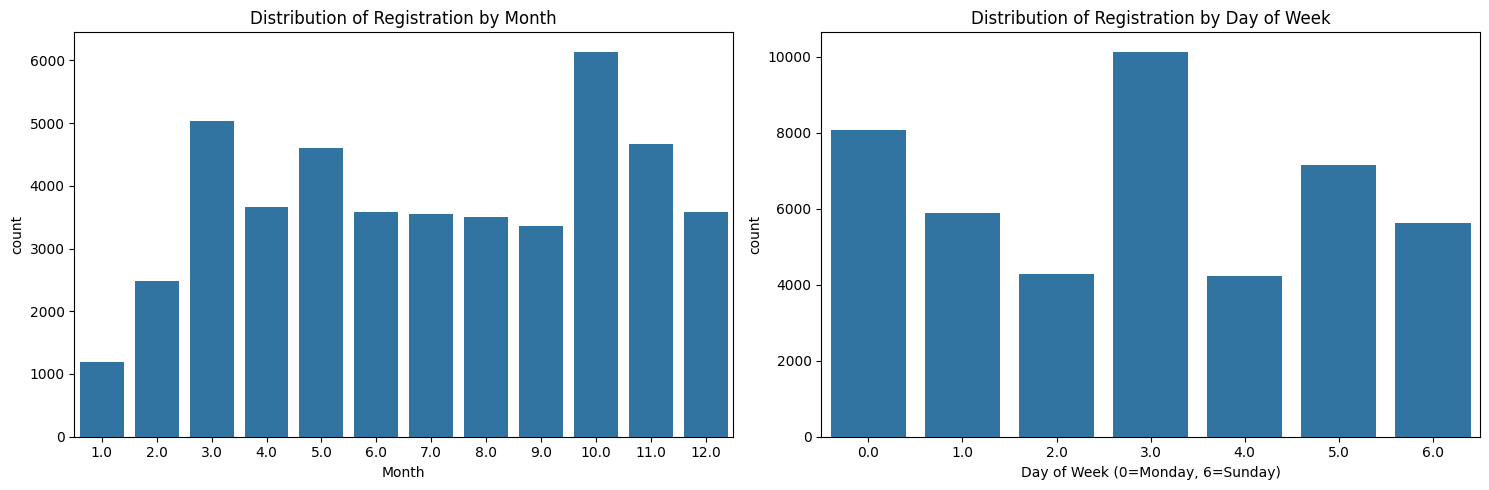

In [17]:
# Distribution of numerical variables
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Registration date distribution
df_processed['tgl_registrasi'] = pd.to_datetime(df_processed['tgl_registrasi'], errors='coerce')
df_processed['bulan_registrasi'] = df_processed['tgl_registrasi'].dt.month
sns.countplot(data=df_processed, x='bulan_registrasi', ax=axes[0])
axes[0].set_title('Distribution of Registration by Month')
axes[0].set_xlabel('Month')

# Registration day of week distribution
df_processed['hari_registrasi'] = df_processed['tgl_registrasi'].dt.dayofweek
sns.countplot(data=df_processed, x='hari_registrasi', ax=axes[1])
axes[1].set_title('Distribution of Registration by Day of Week')
axes[1].set_xlabel('Day of Week (0=Monday, 6=Sunday)')

plt.tight_layout()
plt.savefig(os.path.join(image_dir, 'eda_numerical_distributions.png'), dpi=300, bbox_inches='tight')
plt.show()

## 6. Exploratory Data Analysis (EDA Mendalam)

Eksplorasi data secara mendalam

In [18]:
# EDA Mendalam
print("\n=== EXPLORATORY DATA ANALYSIS (MENDALAM) ===")

# Create a binary target variable for classification (Success/Failure)
# Based on status_kirim - assuming 'Sudah' means success and others mean failure
df_processed['registration_success'] = df_processed['status_kirim'].apply(
    lambda x: 1 if x == 'Sudah' else 0
)

print("Registration success distribution:")
print(df_processed['registration_success'].value_counts())
print(f"Success rate: {df_processed['registration_success'].mean()*100:.2f}%")


=== EXPLORATORY DATA ANALYSIS (MENDALAM) ===
Registration success distribution:
registration_success
1    113564
0     19669
Name: count, dtype: int64
Success rate: 85.24%



status_lanjut vs status_kirim:
status_kirim   Ambil Antrian     Belum     Gagal     Sudah
status_lanjut                                             
Ralan               0.031276  0.016377  0.099975  0.852371


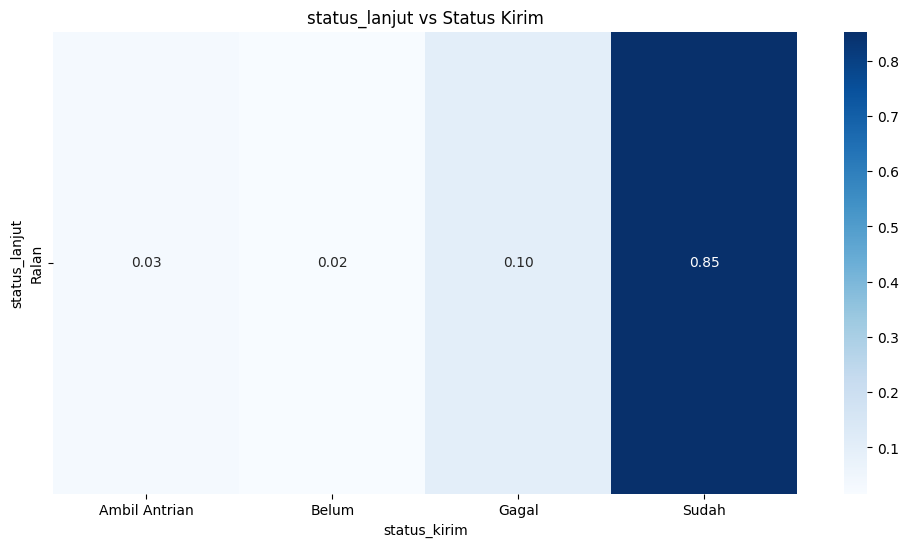


jenis_kunjungan vs status_kirim:
status_kirim     Ambil Antrian     Belum     Gagal     Sudah
jenis_kunjungan                                             
1                     0.035273  0.015220  0.070359  0.879148
2                     0.000000  0.006034  0.037850  0.956116
3                     0.030356  0.016885  0.110501  0.842258
4                     0.258427  0.078652  0.303371  0.359551


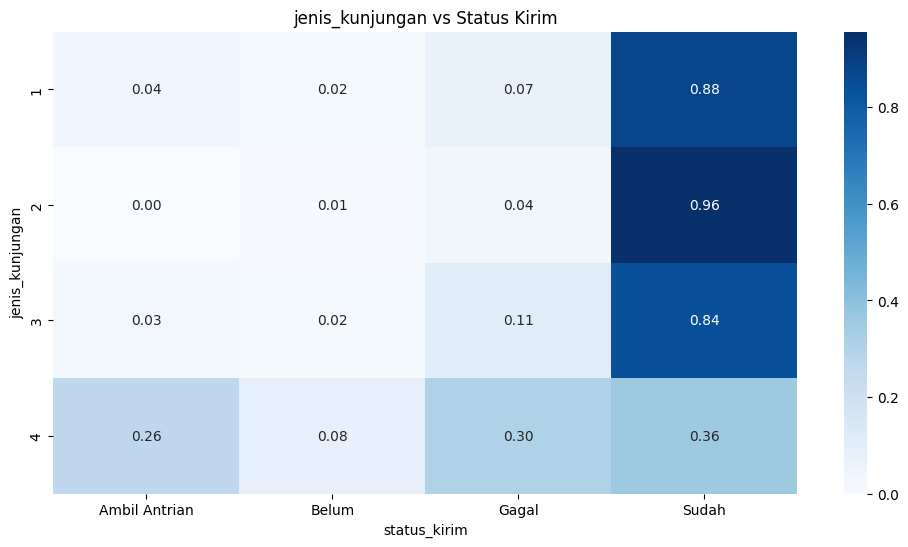


nm_poli vs status_kirim:
status_kirim            Ambil Antrian     Belum     Gagal     Sudah
nm_poli                                                            
KLINIK ANAK                  0.029966  0.016667  0.095791  0.857576
KLINIK BEDAH                 0.023916  0.009072  0.139558  0.827453
KLINIK DOTS                  0.058923  0.020202  0.062290  0.858586
KLINIK GIGI SPESIALIS        0.068752  0.047456  0.083147  0.800644
KLINIK JANTUNG               0.053578  0.029727  0.081576  0.835119
KLINIK JIWA                  0.009167  0.005690  0.100522  0.884621
KLINIK KULIT & KELAMIN       0.015445  0.002522  0.101182  0.880851
KLINIK MATA                  0.018431  0.007080  0.102897  0.871592
KLINIK OBSTETRI/GYN.         0.023712  0.009550  0.092211  0.874527
KLINIK PARU                  0.020886  0.010099  0.095708  0.873307
KLINIK PENYAKIT DALAM        0.032699  0.014256  0.100269  0.852776
KLINIK SARAF                 0.037694  0.022977  0.091676  0.847653
KLINIK THALASEMIA     

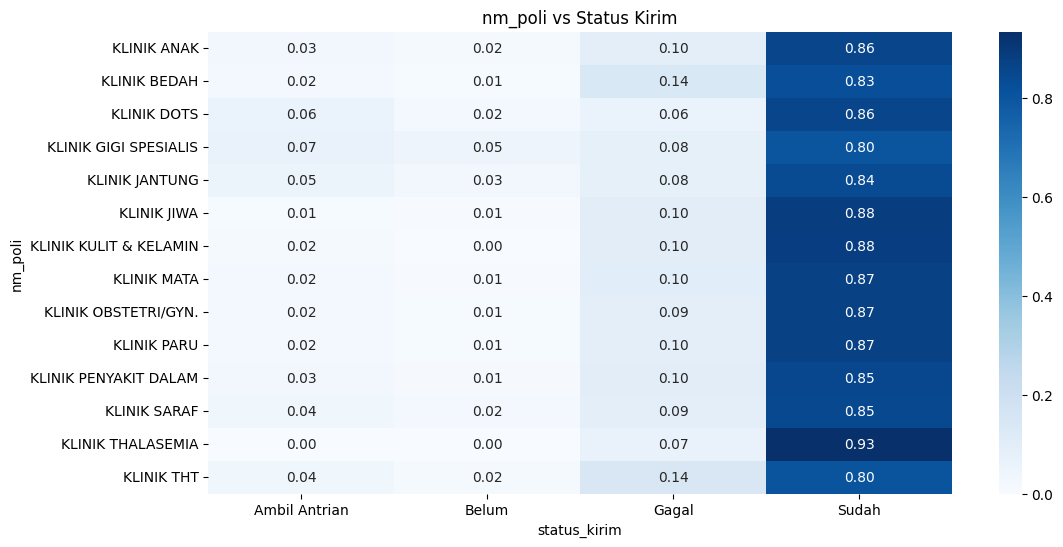


png_jawab vs status_kirim:
status_kirim    Ambil Antrian     Belum     Gagal     Sudah
png_jawab                                                  
BPJS Kesehatan       0.031293  0.016386  0.099939  0.852382
DPP                  0.000000  0.000000  0.239130  0.760870
UMUM                 0.000000  0.000000  0.038462  0.961538


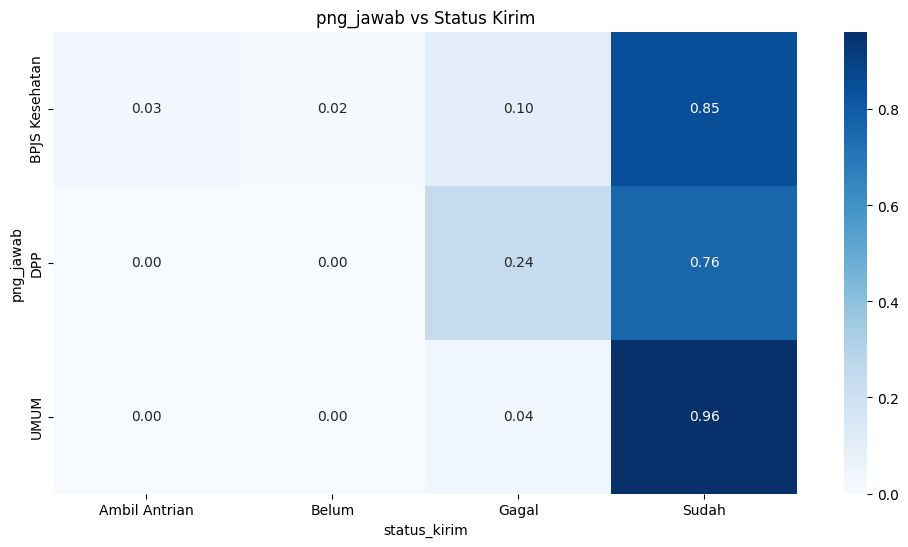


USER vs status_kirim:
status_kirim  Ambil Antrian     Belum     Gagal     Sudah
USER                                                     
51248211           0.000000  0.000000  0.333333  0.666667
51334232           0.026234  0.008507  0.066865  0.898394
51382242           0.000000  0.000000  0.000000  1.000000
51383242           0.021716  0.008442  0.069821  0.900021
51410241           0.014982  0.006555  0.088019  0.890445
59030161           0.000000  0.000000  0.100000  0.900000
59031162           0.000000  0.000000  0.071429  0.928571
59037162           0.012602  0.006301  0.762445  0.218652
59341232           0.000000  0.000000  0.500000  0.500000
71331232           0.021187  0.008234  0.097651  0.872928
AdminUtam          0.000000  0.000000  0.151515  0.848485
SEP Mandiri        0.048310  0.029694  0.107716  0.814281


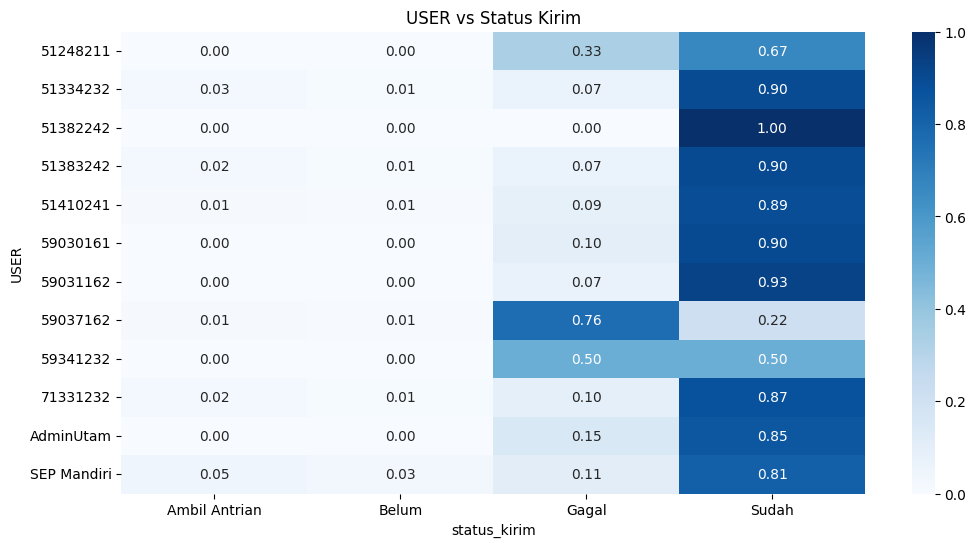

In [19]:
# Analyze relationship between status_kirim and other categorical variables
categorical_features = ['status_lanjut', 'jenis_kunjungan', 'nm_poli', 'png_jawab', 'USER']

for feature in categorical_features:
    if feature in df_processed.columns:
        print(f"\n{feature} vs status_kirim:")
        crosstab = pd.crosstab(df_processed[feature], df_processed['status_kirim'], normalize='index')
        print(crosstab)
        
        # Visualize
        plt.figure(figsize=(12, 6))
        sns.heatmap(crosstab, annot=True, fmt='.2f', cmap='Blues')
        plt.title(f'{feature} vs Status Kirim')
        plt.savefig(os.path.join(image_dir, f'crosstab_{feature}_vs_status_kirim.png'), dpi=300, bbox_inches='tight')
        plt.show()


Registration success by month:
                  total_registrations  successful_registrations  success_rate
bulan_registrasi                                                             
1.0                              1197                      1018         0.850
2.0                              2480                      2140         0.863
3.0                              5028                      4266         0.848
4.0                              3667                      3101         0.846
5.0                              4596                      3909         0.851
6.0                              3584                      3052         0.852
7.0                              3546                      2987         0.842
8.0                              3504                      3023         0.863
9.0                              3366                      2841         0.844
10.0                             6140                      5156         0.840
11.0                            

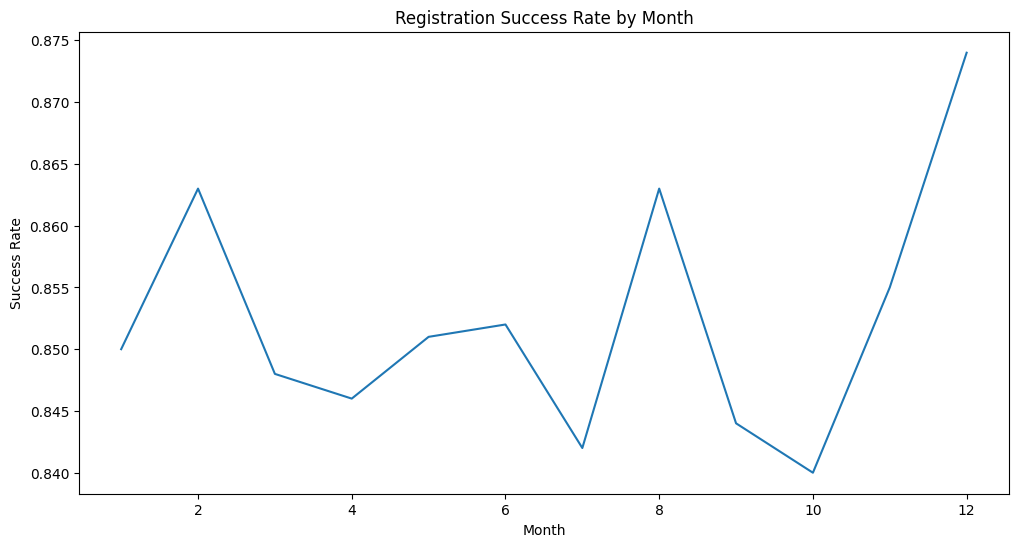

In [20]:
# Time-based analysis
# Convert date columns to datetime
df_processed['tgl_registrasi'] = pd.to_datetime(df_processed['tgl_registrasi'], errors='coerce')
df_processed['tanggal_periksa'] = pd.to_datetime(df_processed['tanggal_periksa'], errors='coerce')

# Extract date components
df_processed['bulan_registrasi'] = df_processed['tgl_registrasi'].dt.month
df_processed['hari_registrasi'] = df_processed['tgl_registrasi'].dt.dayofweek
df_processed['tahun_registrasi'] = df_processed['tgl_registrasi'].dt.year

# Registration success by month
monthly_success = df_processed.groupby('bulan_registrasi')['registration_success'].agg(['count', 'sum', 'mean']).round(3)
monthly_success.columns = ['total_registrations', 'successful_registrations', 'success_rate']
print("\nRegistration success by month:")
print(monthly_success)

# Visualization of registration success by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_success, x=monthly_success.index, y='success_rate')
plt.title('Registration Success Rate by Month')
plt.xlabel('Month')
plt.ylabel('Success Rate')
plt.savefig(os.path.join(image_dir, 'registration_success_by_month.png'), dpi=300, bbox_inches='tight')
plt.show()


Registration success by day of week:
                 total_registrations  successful_registrations  success_rate
hari_registrasi                                                             
0.0                             8070                      6874         0.852
1.0                             5892                      5083         0.863
2.0                             4286                      3608         0.842
3.0                            10132                      8626         0.851
4.0                             4223                      3571         0.846
5.0                             7138                      6144         0.861
6.0                             5622                      4713         0.838


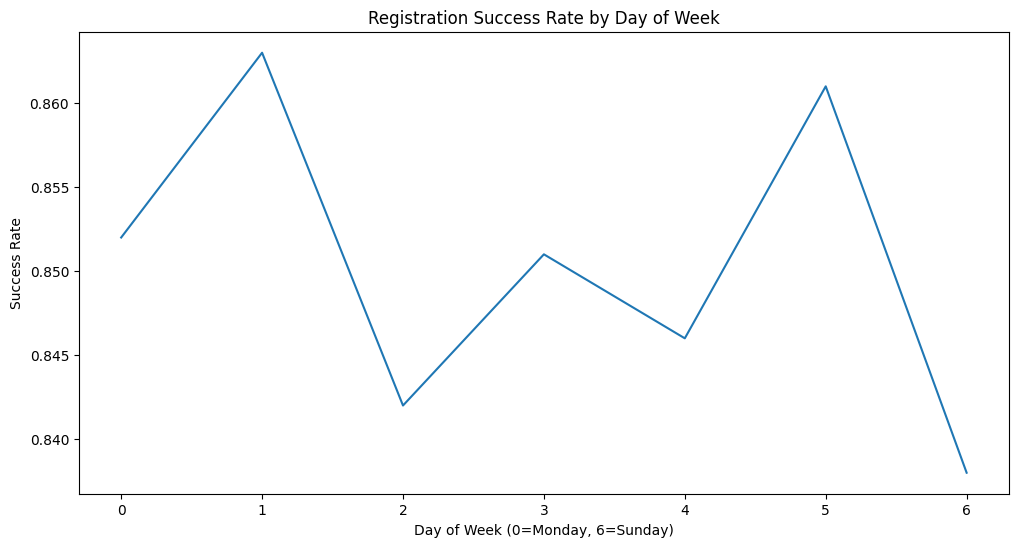

In [21]:
# Registration success by day of week
daily_success = df_processed.groupby('hari_registrasi')['registration_success'].agg(['count', 'sum', 'mean']).round(3)
daily_success.columns = ['total_registrations', 'successful_registrations', 'success_rate']
print("\nRegistration success by day of week:")
print(daily_success)

# Visualization of registration success by day of week
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_success, x=daily_success.index, y='success_rate')
plt.title('Registration Success Rate by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Success Rate')
plt.savefig(os.path.join(image_dir, 'registration_success_by_day.png'), dpi=300, bbox_inches='tight')
plt.show()


Success rate by registration channel:
             total_registrations  successful_registrations  success_rate
USER                                                                    
51248211                       3                         2         0.667
51334232                   16810                     15102         0.898
51382242                       3                         3         1.000
51383242                   18834                     16951         0.900
51410241                   24563                     21872         0.890
59030161                      10                         9         0.900
59031162                      14                        13         0.929
59037162                    1587                       347         0.219
59341232                       8                         4         0.500
71331232                   19068                     16645         0.873
AdminUtam                     66                        56         0.848
SEP Mandiri 

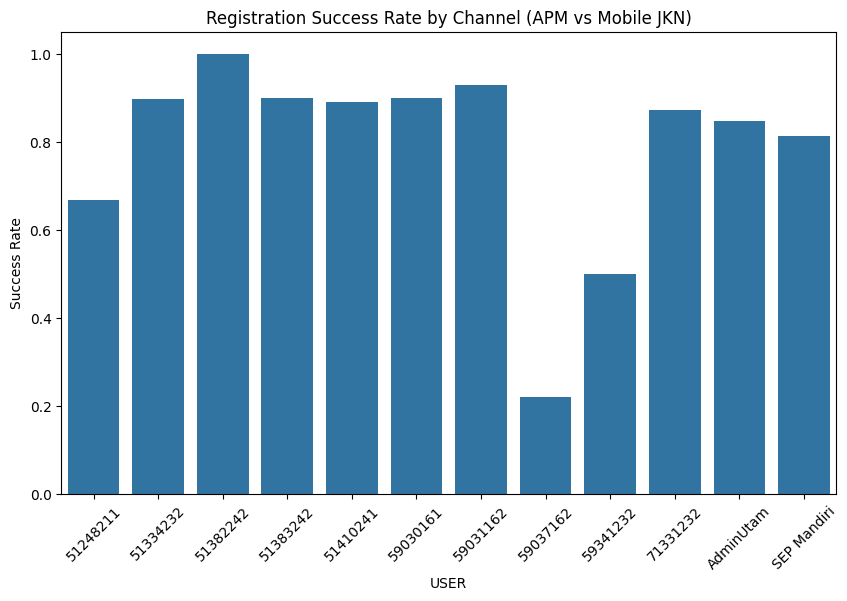

In [22]:
# Success rate comparison between APM and Mobile JKN
channel_success = df_processed.groupby('USER')['registration_success'].agg(['count', 'sum', 'mean']).round(3)
channel_success.columns = ['total_registrations', 'successful_registrations', 'success_rate']
print("\nSuccess rate by registration channel:")
print(channel_success)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_success.reset_index(), x='USER', y='success_rate')
plt.title('Registration Success Rate by Channel (APM vs Mobile JKN)')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.savefig(os.path.join(image_dir, 'registration_success_by_channel.png'), dpi=300, bbox_inches='tight')
plt.show()

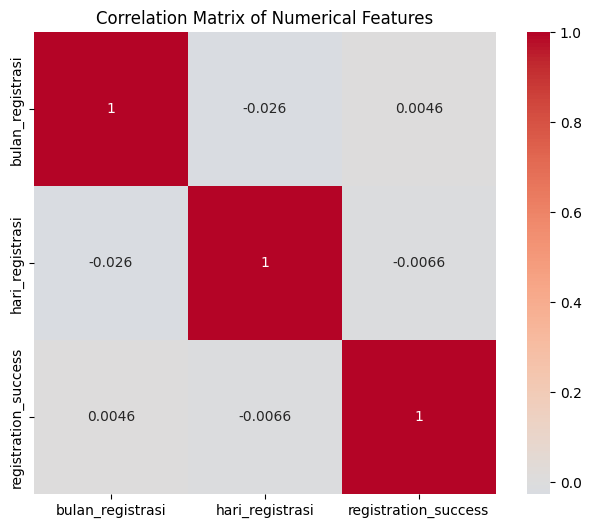

In [23]:
# Correlation heatmap for numerical features
numerical_cols = ['bulan_registrasi', 'hari_registrasi', 'registration_success']
corr_matrix = df_processed[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig(os.path.join(image_dir, 'correlation_matrix.png'), dpi=300, bbox_inches='tight')
plt.show()

## 7. Data Preprocessing

Pra-pemrosesan data untuk modeling

In [24]:
# Data Preprocessing
print("\n=== DATA PREPROCESSING ===")

# Select features for modeling
feature_columns = ['status_lanjut', 'kd_pj', 'png_jawab', 'jenis_kunjungan', 'nm_poli', 'USER', 'bulan_registrasi', 'hari_registrasi']

# Create a new dataframe with selected features
df_modeling = df_processed[feature_columns + ['registration_success']].copy()

# Remove any rows with missing values in the selected features
df_modeling = df_modeling.dropna()
print(f"Shape after feature selection: {df_modeling.shape}")


=== DATA PREPROCESSING ===
Shape after feature selection: (45363, 9)


In [25]:
# Encode categorical variables
categorical_features = ['status_lanjut', 'kd_pj', 'png_jawab', 'jenis_kunjungan', 'nm_poli', 'USER']
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    df_modeling[feature] = le.fit_transform(df_modeling[feature].astype(str))
    label_encoders[feature] = le
    print(f"Encoded {feature}")

Encoded status_lanjut
Encoded kd_pj
Encoded png_jawab
Encoded jenis_kunjungan
Encoded nm_poli
Encoded USER


In [26]:
# Separate features and target
X = df_modeling.drop('registration_success', axis=1)
y = df_modeling['registration_success']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Features: {X.columns.tolist()}")

Features shape: (45363, 8)
Target shape: (45363,)
Features: ['status_lanjut', 'kd_pj', 'png_jawab', 'jenis_kunjungan', 'nm_poli', 'USER', 'bulan_registrasi', 'hari_registrasi']


In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test set shape: X_test {X_test.shape}, y_test {y_test.shape}")
print(f"Training set success rate: {y_train.mean()*100:.2f}%")
print(f"Test set success rate: {y_test.mean()*100:.2f}%")

Training set shape: X_train (36290, 8), y_train (36290,)
Test set shape: X_test (9073, 8), y_test (9073,)
Training set success rate: 85.13%
Test set success rate: 85.13%


In [28]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Data scaling completed")

Data scaling completed


## 8. Training Modeling

Pelatihan model machine learning

In [29]:
# Training Modeling
print("\n=== TRAINING MODELING ===")

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train models
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    print(f"{name} training completed")


=== TRAINING MODELING ===
Training Decision Tree...
Decision Tree training completed
Training Random Forest...
Random Forest training completed
Training Gradient Boosting...
Gradient Boosting training completed


In [30]:
# Make predictions
predictions = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    print(f"Predictions made for {name}")

Predictions made for Decision Tree
Predictions made for Random Forest
Predictions made for Gradient Boosting


## 9. Evaluation Modeling

Evaluasi performa model

In [31]:
# Evaluation Modeling
print("\n=== EVALUATION MODELING ===")

# Evaluate models
evaluation_results = {}

for name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")


=== EVALUATION MODELING ===

Decision Tree Performance:
Accuracy: 0.8453
Precision: 0.7928
Recall: 0.8453
F1-Score: 0.8007

Random Forest Performance:
Accuracy: 0.8489
Precision: 0.7982
Recall: 0.8489
F1-Score: 0.7998

Gradient Boosting Performance:
Accuracy: 0.8579
Precision: 0.8545
Recall: 0.8579
F1-Score: 0.8011


In [32]:
# Create a comparison DataFrame
comparison_df = pd.DataFrame(evaluation_results).T
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                   Accuracy  Precision    Recall  F1-Score
Decision Tree      0.845255   0.792769  0.845255  0.800738
Random Forest      0.848892   0.798159  0.848892  0.799829
Gradient Boosting  0.857930   0.854483  0.857930  0.801134


In [33]:
# Detailed classification report for the best model
best_model_name = comparison_df['F1-Score'].idxmax()
print(f"\nBest model based on F1-Score: {best_model_name}")

print(f"\nDetailed Classification Report for {best_model_name}:")
print(classification_report(y_test, predictions[best_model_name]))


Best model based on F1-Score: Gradient Boosting

Detailed Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.83      0.06      0.10      1349
           1       0.86      1.00      0.92      7724

    accuracy                           0.86      9073
   macro avg       0.85      0.53      0.51      9073
weighted avg       0.85      0.86      0.80      9073



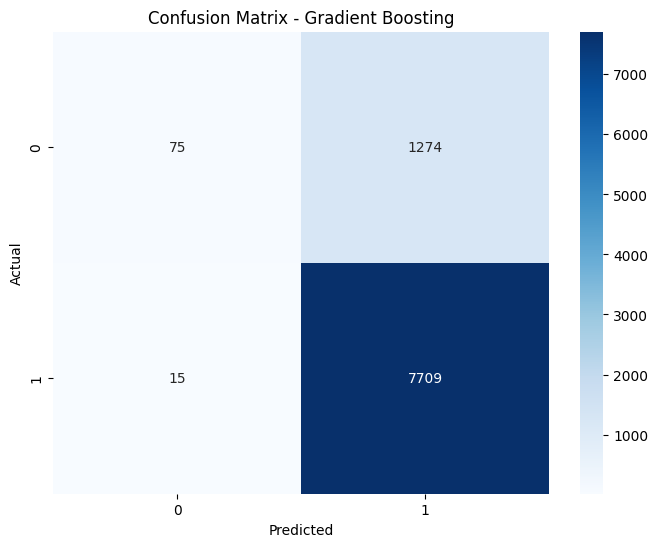

In [34]:
# Confusion Matrix for the best model
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, predictions[best_model_name])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(os.path.join(image_dir, f'confusion_matrix_{best_model_name.replace(" ", "_")}.png'), dpi=300, bbox_inches='tight')
plt.show()

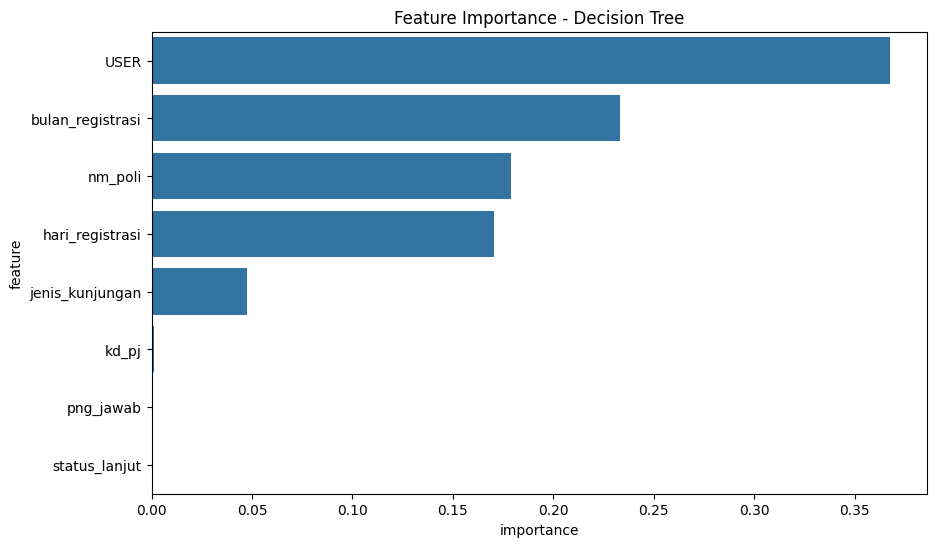


Top 5 important features for Decision Tree:
            feature  importance
5              USER    0.367445
6  bulan_registrasi    0.233230
4           nm_poli    0.179083
7   hari_registrasi    0.170547
3   jenis_kunjungan    0.047367


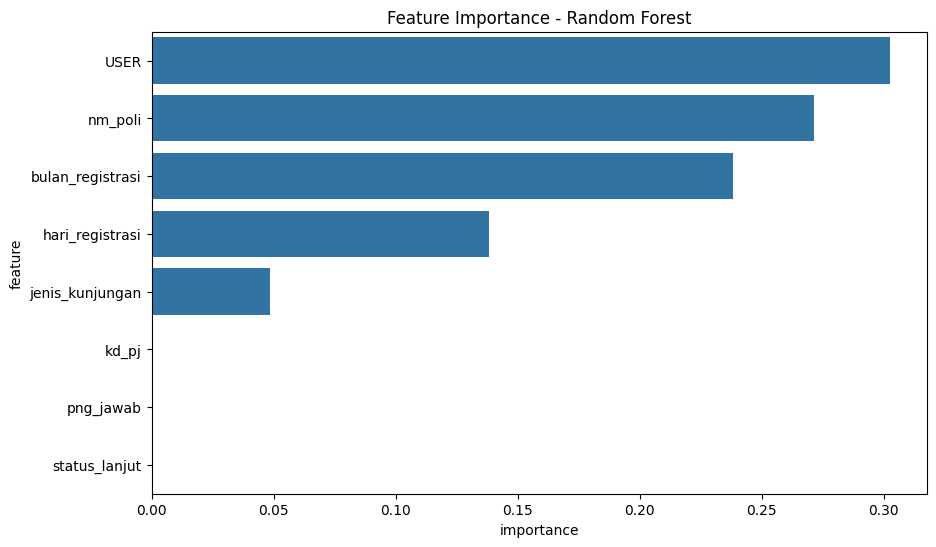


Top 5 important features for Random Forest:
            feature  importance
5              USER    0.302436
4           nm_poli    0.271303
6  bulan_registrasi    0.238235
7   hari_registrasi    0.138279
3   jenis_kunjungan    0.048537


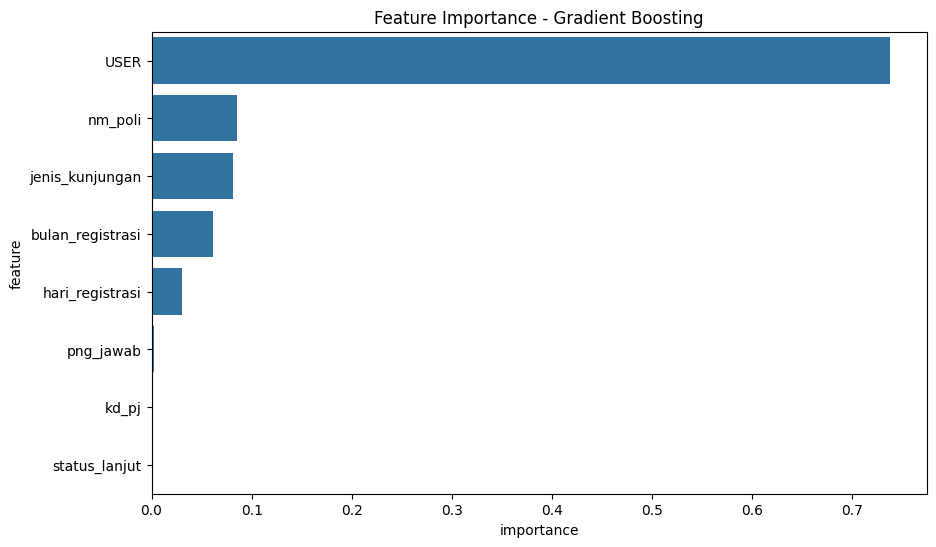


Top 5 important features for Gradient Boosting:
            feature  importance
5              USER    0.737092
4           nm_poli    0.085483
3   jenis_kunjungan    0.081336
6  bulan_registrasi    0.061220
7   hari_registrasi    0.030598


In [35]:
# Feature importance for tree-based models
for name, model in trained_models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
        plt.title(f'Feature Importance - {name}')
        plt.savefig(os.path.join(image_dir, f'feature_importance_{name.replace(" ", "_")}.png'), dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\nTop 5 important features for {name}:")
        print(feature_importance.head())

## 10. Save Model

Penyimpanan model terbaik

In [36]:
# Save Model
print("\n=== SAVE MODEL ===")

import joblib
import os

# Create output directory if it doesn't exist
output_dir = '../output'
os.makedirs(output_dir, exist_ok=True)

# Save the best model
best_model = trained_models[best_model_name]
model_path = os.path.join(output_dir, f'{str(best_model_name).replace(" ", "_")}_model.pkl')
joblib.dump(best_model, model_path)
print(f"Best model ({best_model_name}) saved to {model_path}")

# Save all models
for name, model in trained_models.items():
    model_path = os.path.join(output_dir, f'{str(name).replace(" ", "_")}_model.pkl')
    joblib.dump(model, model_path)
    print(f"Model {name} saved to {model_path}")

# Save preprocessing objects
joblib.dump(scaler, os.path.join(output_dir, 'scaler.pkl'))
joblib.dump(label_encoders, os.path.join(output_dir, 'label_encoders.pkl'))
print(f"Preprocessing objects saved to {output_dir}")

# Save evaluation results
comparison_df.to_csv(os.path.join(output_dir, 'model_comparison.csv'))
print(f"Model comparison saved to {os.path.join(output_dir, 'model_comparison.csv')}")


=== SAVE MODEL ===
Best model (Gradient Boosting) saved to ../output\Gradient_Boosting_model.pkl
Model Decision Tree saved to ../output\Decision_Tree_model.pkl
Model Random Forest saved to ../output\Random_Forest_model.pkl
Model Gradient Boosting saved to ../output\Gradient_Boosting_model.pkl
Preprocessing objects saved to ../output
Model comparison saved to ../output\model_comparison.csv


## 11. Insight & Conclusion

Penarikan kesimpulan dan rekomendasi

In [37]:
# Insight & Conclusion
print("\n=== INSIGHT & CONCLUSION ===")

print("BUSINESS INSIGHTS:")
print(f"1. Best performing model: {best_model_name}")
print(f"2. Best model accuracy: {evaluation_results[best_model_name]['Accuracy']:.4f}")
print(f"3. Best model F1-score: {evaluation_results[best_model_name]['F1-Score']:.4f}")

# Identify the most important features
if best_model_name in trained_models:
    best_model_obj = trained_models[best_model_name]
    if hasattr(best_model_obj, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': best_model_obj.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print(f"4. Most important feature for {best_model_name}: {feature_importance.iloc[0]['feature']} (importance: {feature_importance.iloc[0]['importance']:.4f})")
        print(f"5. Top 3 most important features:")
        for i in range(min(3, len(feature_importance))):

            print("\nCONCLUSIONS:")
            print("- The tree-based models were successfully trained to predict the success of BPJS registration")
            print("- The models can help identify factors that contribute to successful or failed registrations")
            print("- Feature importance analysis can guide improvements in the registration process")

            print("\nRECOMMENDATIONS:")
            print("1. Focus on the most important features identified by the model to improve registration success")
            print("2. Implement monitoring for registration channels with lower success rates")
            print("3. Consider using this model in production to predict potential registration failures and take preventive actions")
            print("4. Regularly retrain the model with new data to maintain its accuracy")
            print("5. Expand the model to include additional features that might impact registration success")


=== INSIGHT & CONCLUSION ===
BUSINESS INSIGHTS:
1. Best performing model: Gradient Boosting
2. Best model accuracy: 0.8579
3. Best model F1-score: 0.8011
4. Most important feature for Gradient Boosting: USER (importance: 0.7371)
5. Top 3 most important features:

CONCLUSIONS:
- The tree-based models were successfully trained to predict the success of BPJS registration
- The models can help identify factors that contribute to successful or failed registrations
- Feature importance analysis can guide improvements in the registration process

RECOMMENDATIONS:
1. Focus on the most important features identified by the model to improve registration success
2. Implement monitoring for registration channels with lower success rates
3. Consider using this model in production to predict potential registration failures and take preventive actions
4. Regularly retrain the model with new data to maintain its accuracy
5. Expand the model to include additional features that might impact registration